# Sentiment Analysis of Climate News and Its Impact on ESG Stock Trading Volumes

This project explores the relationship between climate-related public sentiment and trading volumes of ESG focused stocks, specifically Tesla (TSLA) and First Solar (FSLR). Using sentiment analysis techniques and regression modeling, it investigates how news headlines concerning climate change may influence investor behavior in the financial markets.

In [ ]:
import kagglehub
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


# **Climate Change Headlines**

In [ ]:
# Download and load dataset
path = kagglehub.dataset_download("fringewidth/climate-change-news")
file_path = os.path.join(path, "climate_headlines_sentiment.csv")
df = pd.read_csv(file_path)

100%|██████████| 148k/148k [00:00<00:00, 62.8MB/s]

Extracting files...


**Data cleaning**

most data is not perfect, there is always a possibility there are some values missing from the data. .isna indicates a bolean value to count the values of NaN's in the column

In [ ]:
# Extracting the date from the url's (by - and /) from Link column
df["date"] = df["Link"].str.extract(r'(\d{4}[-/]\d{2}[-/]\d{2})')
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Keep only rows with valid dates
df = df[df["date"].notna()].copy()

# Drop 'Unnamed: 0' column
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Clean and convert sentiment
df = df[df["Sentiment"].notna()]
df["Sentiment"] = pd.to_numeric(df["Sentiment"], errors="coerce")

# Sort by date (oldest to newest)
df = df.sort_values("date").reset_index(drop=True)

# Save to one clean CSV
df.to_csv("dated_climate_headlines.csv", index=False)

# Set 'date' as index for plotting
df = df.set_index("date")

In [ ]:
df.head()

,Headline,Link,Content,Sentiment,Justification
date,,,,,
2024-01-12,China names Liu Zhenmin as special envoy for c...,https://www.reuters.com/world/china/china-name...,"China has named Liu Zhenmin, a former vice fo...",1.0,The appointment of a special envoy for climate...
2024-01-17,London underprepared for deadly climate change...,https://www.reuters.com/world/uk/london-underp...,"London is underprepared for the heatwaves, fl...",-0.5,This points to the negative consequences of in...
2024-01-23,Australia's year ahead in climate and environm...,https://www.abc.net.au/news/science/2024-01-23...,The year has barely started and extreme weath...,0.0,The headline is unclear about its direct impac...
2024-01-25,Climate change drives Amazon rainforest's reco...,https://www.indiatoday.in/environment/story/cl...,Researchers in Brazil have said low water lev...,-1.0,Climate change causing severe drought in the A...
2024-01-28,Climate change activists aim soup at 'Mona Lis...,https://www.reuters.com/world/europe/climate-c...,Two climate change activists hurled soup at t...,-0.5,"While it draws attention to climate issues, th..."


In [ ]:
df.tail()

,Headline,Link,Content,Sentiment,Justification
date,,,,,
2024-10-30,Global Warming Is Making Extreme Rainfall More...,https://www.bloomberg.com/news/articles/2024-1...,Australia is expected to get drenched by more...,0.5,This links climate change to extreme weather e...
2024-10-30,Global Warming Is Making Extreme Rainfall More...,https://www.bloomberg.com/news/articles/2024-1...,Australia is expected to get drenched by more...,-1.0,This headline ties extreme rainfall events in ...
2024-10-31,BOM and CSIRO State of the Climate report 2024...,https://www.abc.net.au/news/2024-10-31/bom-csi...,The 2024 report has found Australia has alrea...,-1.0,The report's predictions on climate impacts in...
2024-10-31,BOM and CSIRO State of the Climate report 2024...,https://www.abc.net.au/news/2024-10-31/bom-csi...,The 2024 report has found Australia has alrea...,1.0,A state of the climate report predicting worse...
2024-10-31,BOM and CSIRO State of the Climate report 2024...,https://www.abc.net.au/news/2024-10-31/bom-csi...,The 2024 report has found Australia has alrea...,0.5,If the report provides crucial data to help wi...


VADER sentiment classification to evaluate the reliability of the manually labeled sentiment scores. This steps offers more transparency about the potential bias or subjectivity in manual scoring

In [ ]:
# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Sample of 5 headlines
sample_df = df.sample(5, random_state=42)[["Headline", "Sentiment"]].copy()

# Applying VADER to each headline
sample_df["VADER_Compound"] = sample_df["Headline"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Display comparison
print(sample_df)

                                                     Headline  Sentiment  \
date                                                                       
2024-01-12  China names Liu Zhenmin as special envoy for c...        1.0   
2024-01-30  Spain's Catalonia Is Spending $2.6 Billion to ...        0.5   
2024-10-23  South Korea to supply stocks of kimchi cabbage...       -0.5   
2024-07-18  South Korea monsoon rains spur evacuations, di...       -0.5   
2024-03-12  Climate change is affecting flow of rivers glo...       -1.0   

            VADER_Compound  
date                        
2024-01-12          0.4019  
2024-01-30          0.0000  
2024-10-23          0.0000  
2024-07-18          0.0000  
2024-03-12          0.0000  


VADER assigned a neutral or slightly positive sentiment to some headlines that the original dataset had labeled as clearly negative. For instance, a headline about climate induced disruptions in monsoon rains scored 0.0000 in VADER but -0.5 in the dataset, pointing to potential limitations in rule based sentiment analysis when handling climate related lunguage. This supports the continued use of manually rated sentiment in this study, while also suggesting hybrid approaches could improve future models.



### Plots

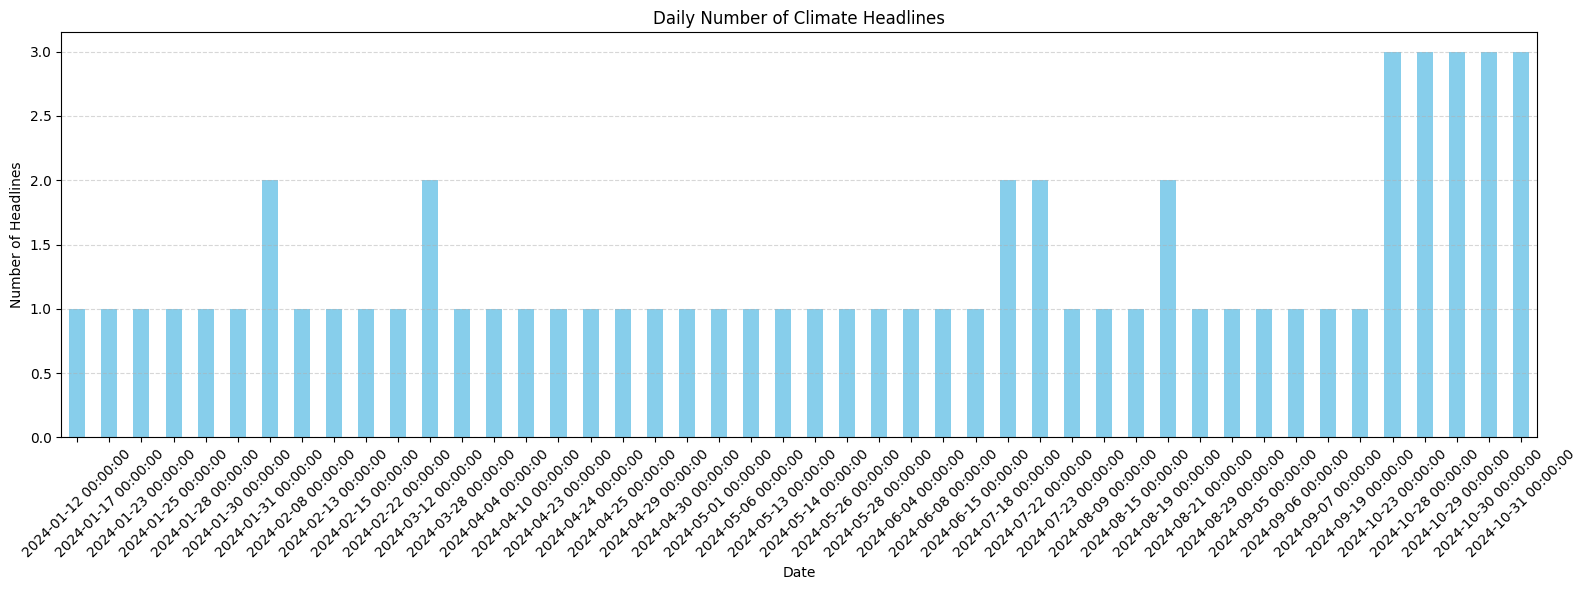

In [ ]:
# Plot 1: Daily count of headlines
daily_counts = df.index.value_counts().sort_index()

plt.figure(figsize=(16, 6))
daily_counts.plot(kind="bar", color="skyblue")
plt.title("Daily Number of Climate Headlines")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


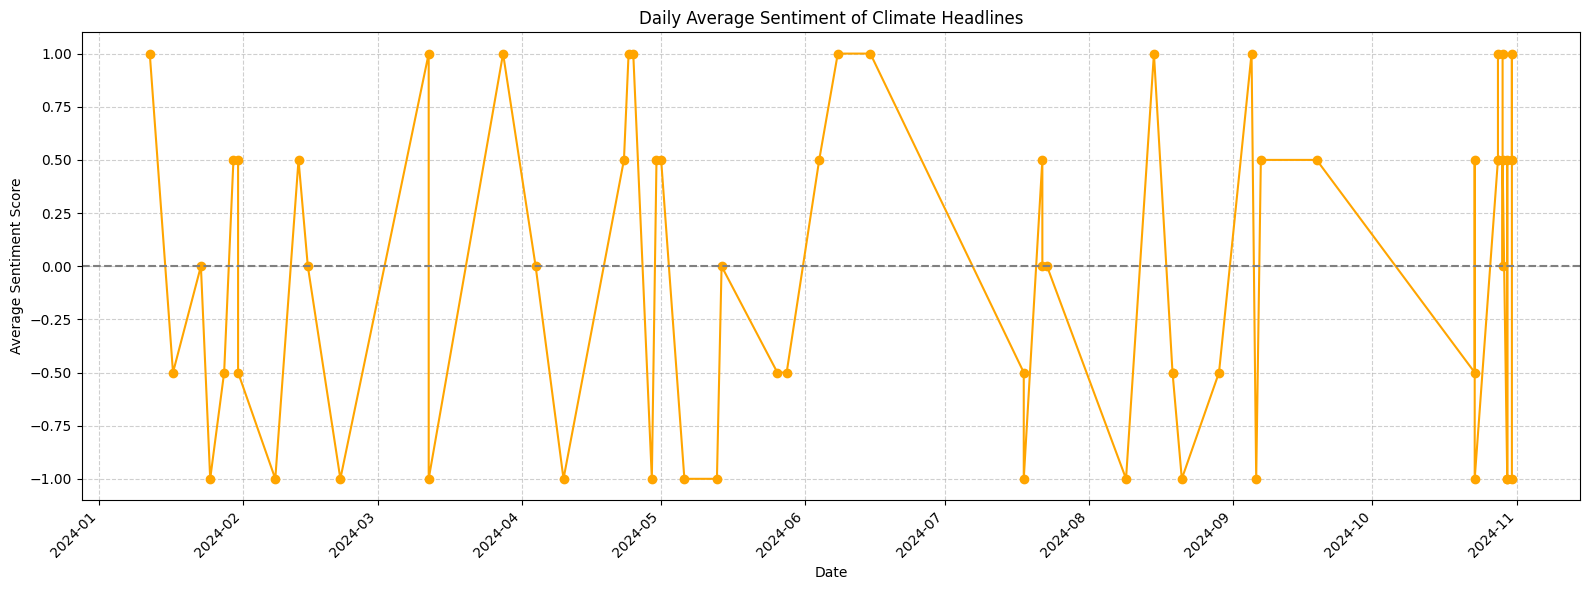

In [ ]:
# Plot 2: Daily average sentiment
daily_sentiment = df["Sentiment"]
plt.figure(figsize=(16, 6))
daily_sentiment.plot(marker='o', linestyle='-', color='orange')
plt.title("Daily Average Sentiment of Climate Headlines")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Stock Volumes**

1.   First Solar, FSLR. Type of stock is renewable energy. **Directly tied to positive climate news.**

2. Tesla, TSLA. High visibility, partly ESG, partly tech. Neutrally tied.

3. ExxonMobil, XOM. Fossil Fuel. **Could react negatively to pro climate sentiment. **


<ipython-input-7-2249702300>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  fslr = yf.download("FSLR", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


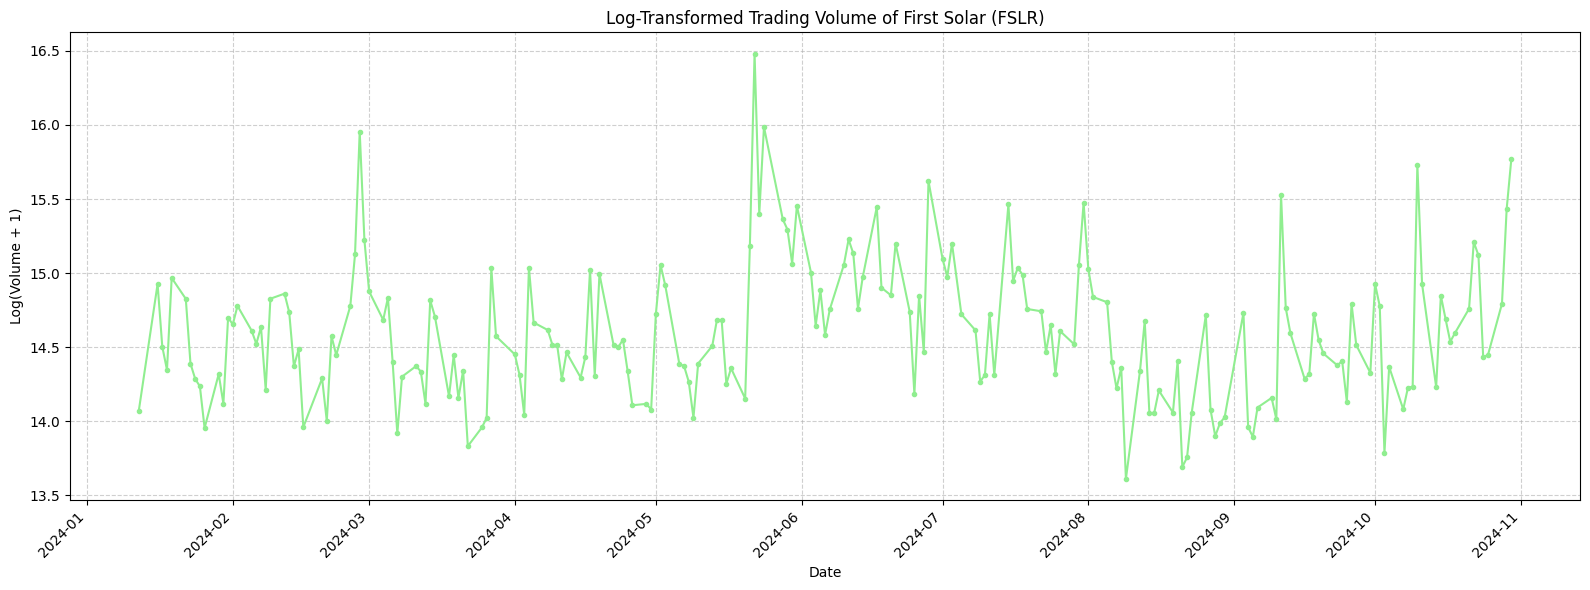

In [ ]:
start_date = "2024-01-12"
end_date = "2024-10-31"

# Download FSLR trading volume
fslr = yf.download("FSLR", start=start_date, end=end_date)

# Log transform volume
fslr_volume = fslr[["Volume"]].copy()
fslr_volume["log_volume"] = np.log1p(fslr_volume["Volume"])


# Plot
plt.figure(figsize=(16, 6))
fslr_volume["log_volume"].plot(marker='.', linestyle='-', color='#90EE90')
plt.title("Log-Transformed Trading Volume of First Solar (FSLR)")
plt.xlabel("Date")
plt.ylabel("Log(Volume + 1)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-4-4194719970>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download("TSLA", start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


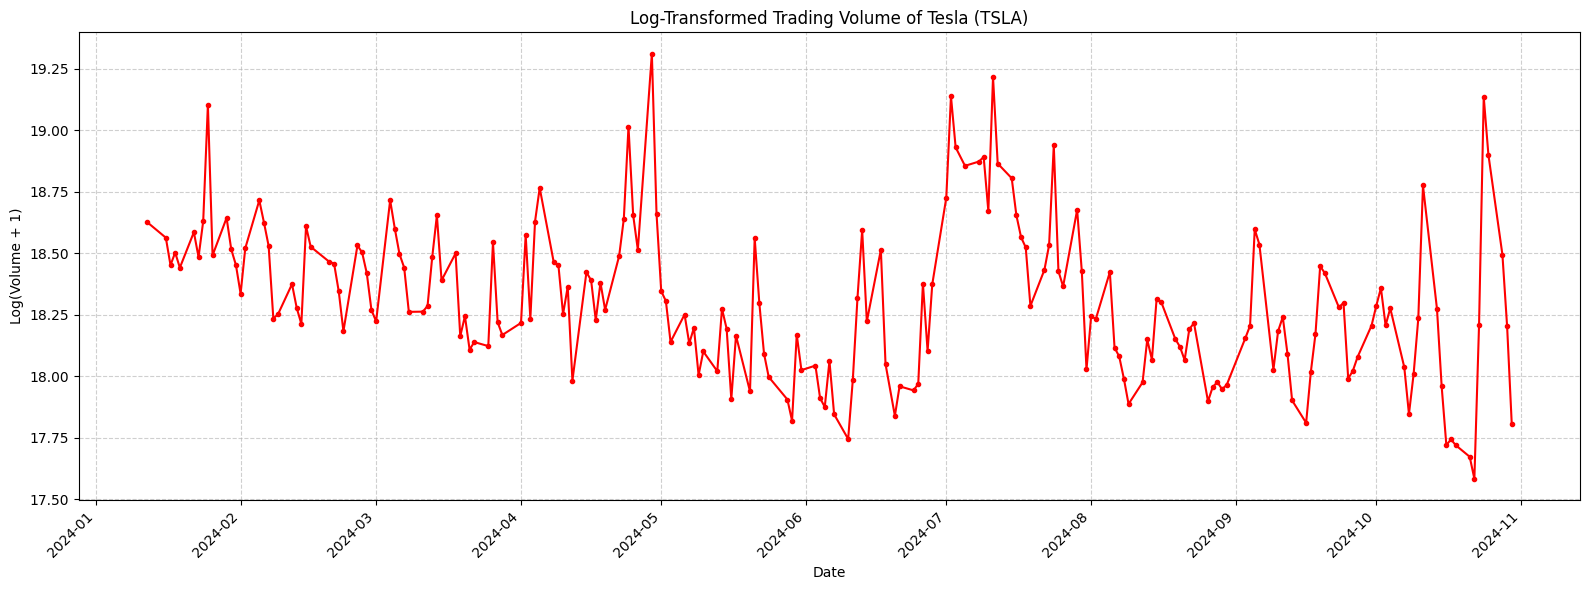

In [ ]:
start_date = "2024-01-12"
end_date = "2024-10-31"

# Download TSLA trading volume
tsla = yf.download("TSLA", start=start_date, end=end_date)

# Log transform volume
tsla_volume = fslr[["Volume"]].copy()
tsla_volume["log_volume"] = np.log1p(tsla_volume["Volume"])


# Plot
plt.figure(figsize=(16, 6))
tsla_volume["log_volume"].plot(marker='.', linestyle='-', color='red')
plt.title("Log-Transformed Trading Volume of Tesla (TSLA)")
plt.xlabel("Date")
plt.ylabel("Log(Volume + 1)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Daily sentiment vs. Daily Volumes

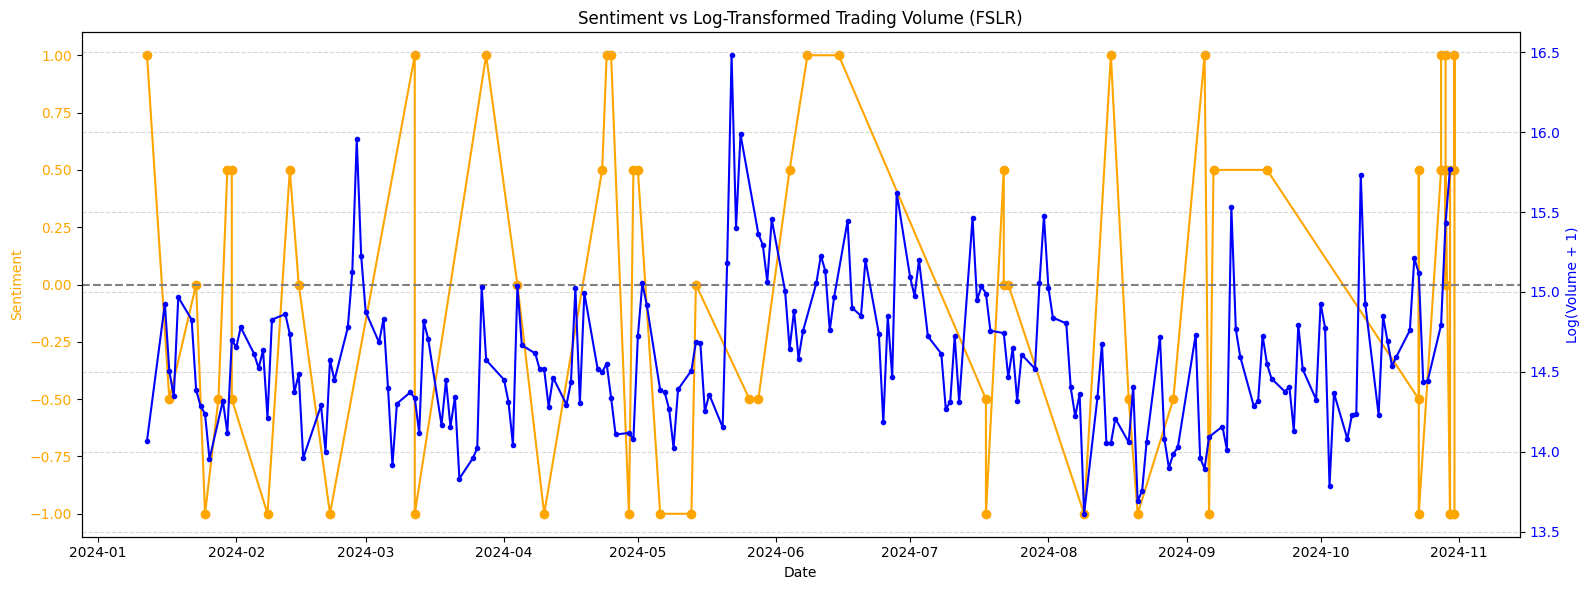

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 6))
#plot average sentiment
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='orange')
ax1.plot(daily_sentiment.index, daily_sentiment, color="orange", marker='o', label="Sentiment")
ax1.tick_params(axis='y', labelcolor="orange")
ax1.axhline(0, color='gray', linestyle='--')

#second y axis for FSLR
ax2 = ax1.twinx()
ax2.set_ylabel("Log(Volume + 1)", color="blue")
ax2.plot(fslr_volume.index, fslr_volume["log_volume"], color="blue", marker='.', label="Volume")
ax2.tick_params(axis='y', labelcolor="blue")

plt.title("Sentiment vs Log-Transformed Trading Volume (FSLR)")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Correlation**

Done to measure the association of two variables, quick and interpretable.


In [ ]:
#Unique dates by average per date on sentiment
sentiment_clean = daily_sentiment.groupby(daily_sentiment.index).mean()
volume_clean = fslr_volume["log_volume"].groupby(fslr_volume.index).mean()


#Aligning sentiment and log volume by date
combined_df = pd.DataFrame({
    "sentiment": sentiment_clean,
    "log_volume": volume_clean
}).dropna()

#Calculate correlation
correlation = combined_df["sentiment"].corr(combined_df["log_volume"])

print(f" Correlation between sentiment and log(volume): {correlation:.3f}")

 Correlation between sentiment and log(volume): 0.078


There is a very weak, to no linear relationship between sentiment and trading volume. A weak correlation may hide subtle relationship(regression) if the sample is small.

### Linear Regression Model

In [ ]:
#using combined_df from correlation
X = combined_df[["sentiment"]]
y = combined_df["log_volume"]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get predictions
y_pred = model.predict(X)

# Model info
coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f" Regression equation: log_volume = {coef:.4f} * sentiment + {intercept:.4f}")
print(f"R-squared score: {r2:.3f}")

 Regression equation: log_volume = 0.0489 * sentiment + 14.4938
R-squared score: 0.006


The equation tells how much volume changes with sentiment
The R squared tells how well sentiment predicts volume


**Regression Equation**

log(volume)=0.0489×sentiment+14.4938

The slope (0.0489) means:
A one-unit increase in sentiment score increases log(volume) by ~0.049

→ That's a very small effect, especially considering sentiment ranges from -1 to +1.

The intercept (14.4938) represents the expected log(volume) when sentiment = 0

**R-squared: 0.006**

Only 0.6% of the variance in trading volume is explained by sentiment.

Sentiment does not meaningfully predict trading volume for FSLR.

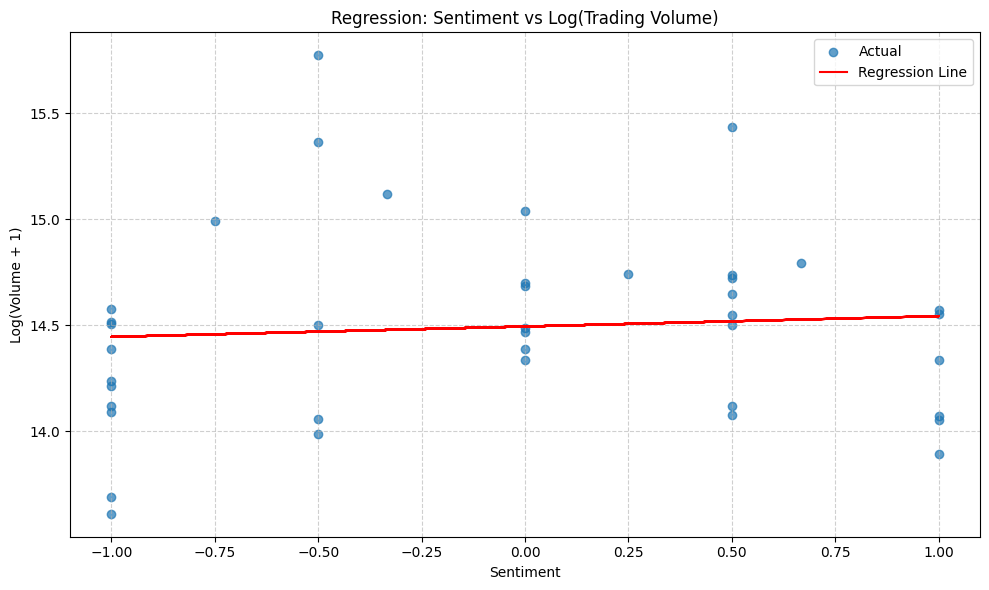

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Actual", alpha=0.7)
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.xlabel("Sentiment")
plt.ylabel("Log(Volume + 1)")
plt.title("Regression: Sentiment vs Log(Trading Volume)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### Testing Lagged effects
To rule out that volume reacts to sentiment the next day.

Shifting sentiment data forward by 1 day

In [ ]:
# Shift sentiment forward by 1 day
lagged_sentiment = sentiment_clean.shift(1)

# Align lagged sentiment with volume
lagged_combined = pd.DataFrame({
    "lagged_sentiment": lagged_sentiment,
    "log_volume": volume_clean
}).dropna()

# Correlation
lag_corr = lagged_combined["lagged_sentiment"].corr(lagged_combined["log_volume"])
print(f" Correlation (lagged): {lag_corr:.3f}")

 Correlation (lagged): 0.216


0.216. There is a notable improvement over the same-day correlation (0.078).

Suggests that the market may respond to sentiment with a delay. This may be due to:


Investors act the next day after processing information

Institutional traders react with a lag


While same-day sentiment showed minimal correlation with trading volume, the 1-day lagged sentiment exhibited a modest positive relationship (r = 0.216), suggesting that market participants may react to climate sentiment with a short delay

### Linear Regression Model (lagged)

In [ ]:
# Combine lagged sentiment and log volume
lagged_combined = pd.DataFrame({
    "lagged_sentiment": sentiment_clean.shift(1),
    "log_volume": volume_clean
}).dropna()

# preparing variables
X_lag = lagged_combined[["lagged_sentiment"]]
y_lag = lagged_combined["log_volume"]

# Fit the regression model
model_lag = LinearRegression()
model_lag.fit(X_lag, y_lag)
y_pred_lag = model_lag.predict(X_lag)

# results
slope = model_lag.coef_[0]
intercept = model_lag.intercept_
r2 = model_lag.score(X_lag, y_lag)

print(f"Lagged Regression: log_volume = {slope:.4f} * sentiment(yesterday) + {intercept:.4f}")
print(f"R-squared score: {r2:.3f}")

Lagged Regression: log_volume = 0.1361 * sentiment(yesterday) + 14.5019
R-squared score: 0.046


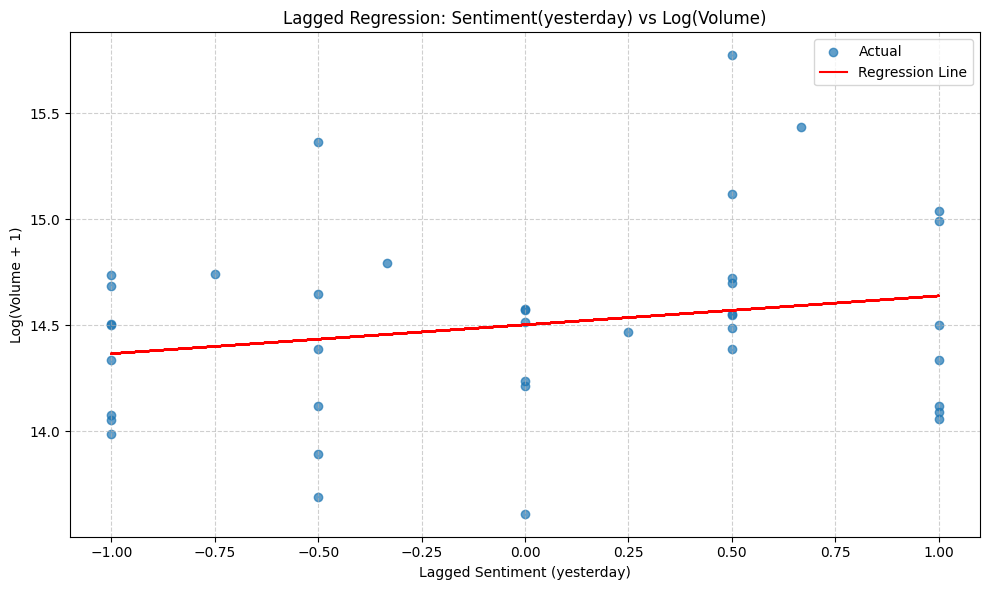

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_lag, y_lag, label="Actual", alpha=0.7)
plt.plot(X_lag, y_pred_lag, color='red', label="Regression Line")
plt.xlabel("Lagged Sentiment (yesterday)")
plt.ylabel("Log(Volume + 1)")
plt.title("Lagged Regression: Sentiment(yesterday) vs Log(Volume)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Yesterday’s public sentiment about climate change shows a modest but stronger ability to explain fluctuations in FSLR’s trading volume, compared to same day sentiment.

This could support a behavioral finance thesis that volume lags sentiment, not leads or follows it instantly



### Testing correlation for 2-day lag
To see if the effect strengthens or fades

In [ ]:
# Create 2-day lagged sentiment
sentiment_lag2 = sentiment_clean.shift(2)

# Combine with log volume and drop missing values
lag2_combined = pd.DataFrame({
    "sentiment_lag2": sentiment_lag2,
    "log_volume": volume_clean
}).dropna()

# Calculate correlation
correlation_lag2 = lag2_combined["sentiment_lag2"].corr(lag2_combined["log_volume"])

print(f"Correlation (2-day lag): {correlation_lag2:.3f}")

Correlation (2-day lag): 0.069


Type of Sentiment	Correlation with log(volume)

*   Same-day sentiment	0.078
*   1-day lagged	0.216 (best)
*   2-day lagged	0.069

Among the three variations tested, sentiment lagged by one day exhibited the highest correlation with trading volume (r = 0.216), suggesting a modest but notable delayed market reaction. This effect disappears by the second day, indicating a short term sensitivity to climate related sentiment


## TESLA (TLSA) Correlation, Linear Regression and 1 day lag effect

In [ ]:
# Download TSLA volume
start_date = "2024-01-12"
end_date = "2024-10-31"
tsla = yf.download("TSLA", start=start_date, end=end_date)
tsla_volume = tsla[["Volume"]]
tsla_volume.loc[:, "log_volume"] = np.log1p(tsla_volume["Volume"])
tsla_volume.index = tsla_volume.index.date
volume_clean_tsla = tsla_volume["log_volume"].groupby(tsla_volume.index).mean()


[*********************100%***********************]  1 of 1 completed
<ipython-input-16-2095060827>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_volume.loc[:, "log_volume"] = np.log1p(tsla_volume["Volume"])


In [ ]:
# Same day correlation and regression
combined_tsla = pd.DataFrame({
    "sentiment": sentiment_clean,
    "log_volume": volume_clean_tsla
}).dropna()

corr = combined_tsla["sentiment"].corr(combined_tsla["log_volume"])
X = combined_tsla[["sentiment"]]
y = combined_tsla["log_volume"]
model = LinearRegression().fit(X, y)
r2 = model.score(X, y)

print(f"Same-day correlation: {corr:.3f}")
print(f" Regression: log_volume = {model.coef_[0]:.4f} * sentiment + {model.intercept_:.4f}")
print(f"R-squared: {r2:.3f}")

# 1-day lag
sentiment_lag1 = sentiment_clean.shift(1)
lagged_df = pd.DataFrame({
    "lagged_sentiment": sentiment_lag1,
    "log_volume": volume_clean_tsla
}).dropna()

lag_corr = lagged_df["lagged_sentiment"].corr(lagged_df["log_volume"])
print(f" 1-day lagged correlation: {lag_corr:.3f}")

# Regression for TSLA
X_lag = lagged_df[["lagged_sentiment"]]
y_lag = lagged_df["log_volume"]
lag_model = LinearRegression().fit(X_lag, y_lag)
lag_r2 = lag_model.score(X_lag, y_lag)

print(f" Lagged Regression: log_volume = {lag_model.coef_[0]:.4f} * sentiment(yesterday) + {lag_model.intercept_:.4f}")
print(f" R-squared (lagged): {lag_r2:.3f}")


Same-day correlation: 0.193
 Regression: log_volume = 0.0865 * sentiment + 18.3953
R-squared: 0.037
 1-day lagged correlation: 0.283
 Lagged Regression: log_volume = 0.1275 * sentiment(yesterday) + 18.3840
 R-squared (lagged): 0.080


Same Day Regression
The effect of sentiment on TSLA’s trading volume is very small (R² = 0.037 → only 3.7% explained).

This is consistent with a weak linear relationship similar to FSLR.



* 1-Day Lagged Correlation: 0.283

Stronger than FSLR’s 1-day lag (which was ~0.216)

This suggests Tesla may be more sensitive to delayed public sentiment on climate topics.

Could reflect Tesla’s high profile in climate discourse and investor attention.

Investor behavior toward Tesla may reflect short term sentiment digestion, reacting the day after major climate related discussions.

Tesla’s branding and public perception as a climate focused company may make it more sensitive to this type of delayed market response compared to other stocks like FSLR.

The low R² values overall highlight that many other factors (e.g., earnings reports, macroeconomic indicators, EV market news) likely drive Tesla’s volume more than climate sentiment alone.

# Conclusion

This project explored how public sentiment toward climate change relates to the trading volume of environmentally linked stocks. Results show a weak but noticeable delayed effect, particularly for Tesla, suggesting short term investor sensitivity to ESG discourse.

| Metric                        | FSLR      | TSLA         |
| ----------------------------- | --------- | ------------ |
| **Same-Day Correlation**      | 0.078     | 0.193        |
| **Same-Day Regression Slope** | 0.0489    | 0.0865       |
| **Same-Day Intercept**        | 14.4938   | 18.3953      |
| **Same-Day R²**               | 0.006     | 0.037        |
| **1-Day Lagged Correlation**  | **0.216** | **0.283**    |
| **2-Day Lagged Correlation**  | 0.069     | *Not tested* |
